In [1]:
import pandas as pd
import numpy as np

In [8]:
np.random.seed(10)

In [9]:
ref = pd.read_excel("D:\\IIT\\PhD projects\\_dG study\\neg off-target analysis-CRISPcut\\6 CRISPcut_final_result\\all_pred_compiled.xlsx")
df = pd.read_excel("D:\\IIT\\PhD projects\\_dG study\\neg off-target analysis-CRISPcut\\data.xlsx")

In [10]:
off_target = []
target = []
for i in range(len(df)):
    off_target.append(df.loc[i,"off-target seq"])
    target.append(df.loc[i,"target"])

In [11]:
#for chromosome and strand from reference dataframe
chromosome =[]
strand=[]
for i in range(len(ref)):
    for j in range(len(target)):
        if (target[j] == ref.loc[i,"target"]) and (off_target[j] == ref.loc[i,"off-target"]):
            chromosome.append(ref.loc[i,"Chromosome"])
            strand.append(ref.loc[i,"Strand"])
            break

In [12]:
#convert strand into numeric values
for i in range(len(strand)):
    if strand[i] == "+":
        strand[i] = 1
    elif strand[i] == "-":
        strand[i] = 0
    else:
        pass

In [13]:
#to make a 2D array pos_mm to store 1 at places where there is a mismatch in the sequences
pos_mm = []
for i in range(len(df)):
    l=[]
    for j in range(23):
        if (target[i][j]== off_target[i][j] or target[i][j] == 'N' or off_target[i][j] == 'N'):
            l.append(0)
        else:
            l.append(1)
    x = np.transpose(l)#to make a 2D array pos_mm to store 1 at places where there is a mismatch in the sequences
pos_mm = []
for i in range(len(df)):
    l=[]
    for j in range(23):
        if (target[i][j]== off_target[i][j] or target[i][j] == 'N' or off_target[i][j] == 'N'):
            l.append(0)
        else:
            l.append(1)
    x = np.transpose(l)
    pos_mm.append(x)

In [14]:
x = pd.DataFrame(pos_mm, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

In [15]:
#to form lists of transitions, transversions and indels in the Off-target Sequence
count_transversions=[]
count_transitions =[]

for i in range(len(x)):
    a=0
    b=0
    for j in range(23):
        if (target[i][j] == 'A') and ((off_target[i][j] == 'C') or (off_target[i][j] == 'T')):
            a=a+1
        elif (target[i][j] == 'G') and ((off_target[i][j] == 'T') or (off_target[i][j] == 'C')):
            a=a+1
        elif (target[i][j] == 'C') and ((off_target[i][j] == 'G') or (off_target[i][j] == 'A')):
            a=a+1
        elif (target[i][j] == 'T') and ((off_target[i][j] == 'A') or (off_target[i][j] == 'G')):
            a=a+1
        elif (target[i][j] == 'A') and (off_target[i][j] == 'G'):
            b=b+1
        elif (target[i][j] == 'G') and (off_target[i][j] == 'A'):
            b=b+1
        elif (target[i][j] == 'C') and (off_target[i][j] == 'T'):
            b=b+1
        elif (target[i][j] == 'T') and (off_target[i][j] == 'C'):
            b=b+1
        else:
            pass
    count_transversions.append(a)
    count_transitions.append(b)

In [16]:
#to form list of pam_transitions, pam_transversions and pam_indels in last position of off-target Sequence
pam_transversions1=[]
pam_transitions1 =[]

for i in range(len(x)):
    if ((off_target[i][-1]) == 'G'):
        pam_transversions1.append(0)
        pam_transitions1.append(0)
    
    elif (off_target[i][-1] == 'A'):
        pam_transitions1.append(1)
        pam_transversions1.append(0)
    
    elif (off_target[i][-1] =='C') or (off_target[i][-1] == 'T'):
        pam_transversions1.append(1)
        pam_transitions1.append(0)    
    else:
        pass

In [17]:
#to form list of pam_transitions, pam_transversions and pam_indels in 2nd last position of off-target Sequence
pam_transversions2=[]
pam_transitions2 =[]

for i in range(len(x)):
    if ((off_target[i][-2]) == 'G'):
        pam_transversions2.append(0)
        pam_transitions2.append(0)
    
    elif (off_target[i][-2] == 'A'):
        pam_transitions2.append(1)
        pam_transversions2.append(0)
    
    elif (off_target[i][-2] =='C') or (off_target[i][-2] == 'T'):
        pam_transversions2.append(1)
        pam_transitions2.append(0)    
    else:
        pass

In [18]:
pam_transitions = []
pam_transversions = []
pam_indels = []
for i in range(len(x)):
    pam_transitions.append(pam_transitions1[i] + pam_transitions2[i])
    pam_transversions.append(pam_transversions1[i] + pam_transversions2[i])

In [19]:
#to calculate distance in x
distance = []
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]+count_transitions[i]+count_transversions[i]
    distance.append(a)

In [20]:
max(distance)

14

In [21]:
#to calculate pam_mm in x
pam_mm =[]
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]
    pam_mm.append(a)

In [22]:
x['Chromosome'] = chromosome
x['Strand'] = strand
x['Count transitions'] = count_transitions
x['Count transversions'] = count_transversions
x['pam transversions'] = pam_transversions
x['pam transitions'] = pam_transitions
x['Distance'] = distance
x['pam mm'] = pam_mm

In [23]:
#to calculate percent of G and C in off-target Sequence
percent_gc = []
for i in range(len(x)):
    a=0
    for j in range(23):
        if (off_target[i][j] == 'G' or off_target[i][j]== 'C'):
            a= a+1
    percent_gc.append((a/len(off_target[i]))*100) 

In [24]:
#to calculate number of G and C from position 11 to 20 in Off-target Sequence
seed_gc = []
for i in range(len(x)):
    a=0
    for j in range(10):
        if (off_target[i][-1-(j+3)] =='G' or off_target[i][-1-(j+3)] == 'C'):
            a=a+1
    seed_gc.append((a/10)*100)

In [25]:
x['% GC'] = percent_gc
x['seed GC'] = seed_gc

In [26]:
x['dG REC3:hybrid'] = df[['dG REC3:hybrid']]
x['dG RNA:DNA'] = df[['dG RNA:DNA']]

In [27]:
y=[]
for i in range(len(x)):
    y.append(0)

In [28]:
y=pd.DataFrame(y, columns=['Output'])

In [29]:
x1=pd.read_excel("D:\\IIT\\PhD projects\\_dG study\\dG for off-t sets\\regression_df.xlsx")
len(x1)

186

In [30]:
x1.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,pam_mm,pam_transitions,pam_transversions,count_transitions,count_transversions,distance,percent_gc,seed_gc,dG_rec3,dG_DNA
0,0,1,0,0,0,0,1,0,0,0,...,2,2,0,5,0,7,30.434783,50,-134.08,-165.35
1,1,1,0,0,0,0,1,0,0,0,...,2,2,0,5,0,7,30.434783,50,-134.08,-165.35
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2,3,47.826087,40,-125.18,-146.79
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2,3,47.826087,40,-125.18,-146.79
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.173913,50,-120.50,-177.14


In [31]:
x1.drop("Unnamed: 0", axis=1, inplace=True)
x1.drop("Cell H", axis=1, inplace=True)
x1.drop("Cell K", axis=1, inplace=True)
x1.drop("Cell U", axis=1, inplace=True)
x1.drop("#mm", axis=1, inplace=True)

In [32]:
x1.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'Chromosome', 'Strand', 'pam_mm', 'pam_transitions',
       'pam_transversions', 'count_transitions', 'count_transversions',
       'distance', 'percent_gc', 'seed_gc', 'dG_rec3', 'dG_DNA'],
      dtype='object')

In [33]:
x.drop("Count transitions", axis=1, inplace=True)
x.drop("Count transversions", axis=1, inplace=True)
x.drop("pam transitions", axis=1, inplace=True)
x.drop("pam transversions", axis=1, inplace=True)
x.drop("Distance", axis=1, inplace=True)
x.drop("pam mm", axis=1, inplace=True)
x.drop("% GC", axis=1, inplace=True)
x.drop("seed GC", axis=1, inplace=True)
x.drop("dG REC3:hybrid", axis=1, inplace=True)
x.drop("dG RNA:DNA", axis=1, inplace=True)

In [34]:
x['pam_mm'] = pam_mm
x['pam_transitions'] = pam_transitions
x['pam_transversions'] = pam_transversions
x['count_transitions'] = count_transitions
x['count_transversions'] = count_transversions
x['distance'] = distance
x['percent_gc'] = percent_gc
x['seed_gc'] = seed_gc
x['dG_rec3'] = df[['dG REC3:hybrid']]
x['dG_DNA'] = df[['dG RNA:DNA']]

In [35]:
y1=[]
for i in range(len(x1)):
    y1.append(1)

In [36]:
y1=pd.DataFrame(y1, columns=['Output'])

In [37]:
len(y1)

186

In [38]:
X= pd.concat([x,x1], axis=0)

In [39]:
Y=pd.concat([y,y1], axis=0)

In [40]:
X['Output'] = Y

In [41]:
len(Y)

312

In [42]:
X= X.sample(frac=1).reset_index(drop=True)

In [43]:
Y=X["Output"]

In [44]:
X.drop("Output", axis=1, inplace=True)

In [45]:
#for converting X and Y chromosome to integers
for i in range(len(X)):
    if (X.loc[i,"Chromosome"] == 'X'):
        X.loc[i,"Chromosome"] = 23
    elif (X.loc[i,"Chromosome"] == 'Y'):
        X.loc[i,"Chromosome"] = 24
    else:
        pass

In [46]:
x_test = X[0:78]
x_train = X[78:]

In [47]:
y_test= Y[0:78]
y_train = Y[78:]

In [48]:
# training a basic neural network for comparison

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate

In [51]:
clf = MLPClassifier(hidden_layer_sizes=(256,8), random_state=1, max_iter=600).fit(x_train, y_train)
# clf.predict_proba(x_test)
y_p = clf.predict(x_test)
print(clf.score(x_test, y_test)) #accuracy
cm = metrics.confusion_matrix(y_test, y_p)
print(cm)

0.9230769230769231
[[27  3]
 [ 3 45]]


In [52]:
cv=cross_validate(clf, X, Y, cv=5, return_train_score=True)
print(cv['test_score'])
print(cv['test_score'].mean()) 
print(cv['train_score'])
print(cv['train_score'].mean()) 

[0.875      0.87096774 0.83870968 0.87096774 0.85483871]
0.8620967741935484
[0.93951613 0.968      0.968      0.928      0.9       ]
0.9407032258064516


In [42]:
#confusion matrix, precision-recall curve, accuracy, F1 score

In [44]:
#building a random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
accuracy=[]
I=[]
J=[]
for i in range(40):
    for j in range(40):
        clf = RandomForestClassifier(n_estimators = i+1, random_state=j)
        clf.fit(x_train,y_train)
        y_p = clf.predict(x_test)
        accuracy.append(metrics.accuracy_score(y_test, y_p))
        I.append(i)
        J.append(j)

In [ ]:
print(accuracy)

In [116]:
#third highest
print(accuracy.index(0.9102564102564102))
print(I[123])
print(J[123])

63
3
3


In [50]:
print(max(accuracy))
print(accuracy.index(max(accuracy))) 
print(I[143]) 
print(J[143]) 

0.9487179487179487
143
3
23


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf = RandomForestClassifier(n_estimators = 4, random_state=23) 
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
#for cross validation

from sklearn.model_selection import cross_validate
cv=cross_validate(clf, X, Y, cv=5, return_train_score=True)
print(cv['test_score'])
print(cv['test_score'].mean()) 
print(cv['train_score'])
print(cv['train_score'].mean()) 

[0.890625   0.85483871 0.83870968 0.87096774 0.85483871]
0.8619959677419355
[0.95564516 0.98       0.984      0.972      0.968     ]
0.9719290322580644


In [48]:
#logistic regression
#from sklearn.linear_model import LogisticRegression
#I1=[]
#accuracy1 = []
#for i in range(30):
 #   x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.20, random_state=i)
 #   logreg = LogisticRegression(solver='liblinear')
  #  logreg.fit(x_train, y_train)
  #  predictions = logreg.predict(x_test)
  #  accuracy1.append(logreg.score(x_test,y_test))
  #  I1.append(i)

In [49]:
#print(max(accuracy1))
#print(accuracy1.index(max(accuracy1)))
#print(I[4])

In [46]:
#logistic regression ----------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
I=[]
accuracy = []
for i in range(40):
    logreg = LogisticRegression(solver='newton-cg', random_state=i)
    logreg.fit(x_train, y_train)
    predictions = logreg.predict(x_test)
    accuracy.append(logreg.score(x_test,y_test))
    I.append(i)

In [47]:
print(max(accuracy))
print(accuracy.index(max(accuracy)))
print(I[0])

0.8846153846153846
0
0


In [149]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg', random_state=0)
logreg.fit(x_train, y_train)
predictions_test = logreg.predict(x_test)
predictions_train = logreg.predict(x_train)
predictions_X = logreg.predict(X) # do not mergre the train-test like this
print(logreg.score(x_test,y_test))

0.8846153846153846


In [150]:
predictions_test_proba = logreg.predict_proba(x_test)

In [153]:
predictions_test_proba = predictions_test_proba[:,1]

In [154]:
predictions_test_proba

array([9.97e-01, 9.94e-01, 9.97e-01, 9.96e-01, 6.51e-01, 3.11e-03,
       8.80e-02, 9.18e-01, 1.54e-04, 9.95e-01, 9.83e-01, 9.96e-01,
       2.89e-03, 1.00e+00, 9.98e-01, 5.24e-01, 9.40e-01, 1.30e-01,
       9.99e-01, 7.90e-01, 1.49e-01, 9.83e-01, 9.88e-01, 9.95e-01,
       4.88e-05, 9.93e-01, 9.97e-01, 8.91e-01, 7.16e-01, 9.98e-01,
       3.96e-04, 1.00e+00, 9.96e-01, 8.02e-01, 9.90e-01, 4.33e-03,
       9.76e-01, 1.64e-01, 1.44e-01, 1.67e-04, 1.07e-01, 9.99e-01,
       1.30e-01, 2.54e-03, 9.97e-01, 9.35e-01, 9.59e-01, 9.79e-01,
       1.00e+00, 5.21e-01, 5.94e-01, 1.02e-01, 3.81e-01, 9.15e-01,
       9.93e-01, 9.97e-01, 9.90e-01, 6.91e-03, 9.22e-01, 7.28e-01,
       5.16e-01, 3.07e-08, 9.78e-01, 4.94e-01, 9.08e-01, 1.01e-02,
       9.96e-01, 4.82e-02, 1.77e-03, 9.94e-01, 9.99e-01, 9.84e-01,
       4.05e-01, 4.53e-02, 7.62e-02, 8.86e-03, 9.92e-01, 9.97e-01])

In [144]:
# 0.22.2 pe update karna badme

'0.21.3'

In [152]:
from sklearn import metrics

In [155]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_test_proba)

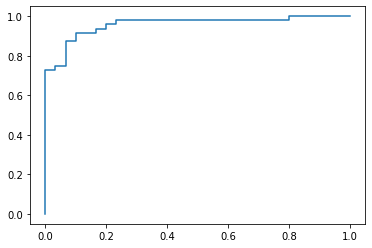

In [156]:
plt.plot(fpr,tpr)
plt.show() 


In [158]:
# This is the AUC
auc = np.trapz(tpr,fpr)
auc

0.9576388888888888

In [131]:
from sklearn.linear_model import LogisticRegressionCV
logreg=LogisticRegressionCV(cv=5, random_state=0, solver='newton-cg').fit(X,Y)
print(logreg.score(X,Y))
print(logreg.score(x_test, y_test))
print(logreg.score(x_train, y_train))

0.8974358974358975
0.9102564102564102
0.8931623931623932


In [132]:
#for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_p)
print(cm)

[[28  2]
 [ 2 46]]


In [91]:
predictions_X = pd.DataFrame(clf.predict(X))
pred_X_prob = pd.DataFrame(clf.predict_proba(X))
horizontal_stack = pd.concat([X, Y, predictions_X, pred_X_prob], axis=1)
horizontal_stack.to_excel(r"D:\IIT\PhD projects\_dG study\manuscript\IEEE TCBB_revision\revision\sota_comparison\RF_predictions_on_entire_X.xlsx") 

In [ ]:
pred_X_prob

In [47]:
###### reusmes RF analysis #################
rf_pred_X_prob = clf.predict_proba(x_test)

In [ ]:
rf_pred_X_prob

In [212]:
cm1 = metrics.confusion_matrix(y_test, y_p)
print(cm1)

[[28  2]
 [ 2 46]]


In [186]:
# def plot_confusion_matrix(c, title='Confusion matrix', cmap=plt.cm.Blues):
#     plt.imshow(c, interpolation= 'nearest',cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     plt.xticks(tick_marks, y_names)
#     plt.yticks(tick_marks, y_names)
#     plt.tight_layout()
#     plt.xlabel('True Label')
#     plt.ylabel('Predicted Label')

In [187]:
# np.set_printoptions(precision=2)
# print(cm1)
# plt.figure()
# plot_confusion_matrix(cm1)

Text(0.5, 0, 'Predicted label')

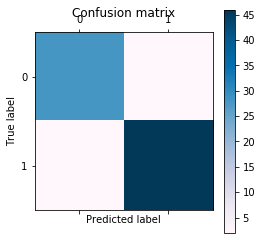

In [213]:
plt.matshow(cm1, cmap='PuBu')
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[0.93 0.07]
 [0.04 0.96]]


<Figure size 720x720 with 0 Axes>

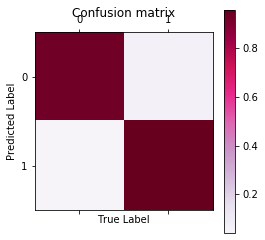

In [217]:
#normalized confusion matrix

plt.figure(figsize=(10,10))

cm2 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
print(cm2)
plt.matshow(cm2, cmap='PuRd')
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

plt.savefig(r'D:\IIT\PhD projects\_dG study\manuscript\images\normalized_confusion_matrix.png', dpi=600)

In [59]:
#for precision recall curve for whole data
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Precision score:", precision_score(Y, predictions_X))
print("Recall score:", recall_score(Y, predictions_X))
print("F1 score:", f1_score(Y, predictions_X))

Precision score: 0.9834254143646409
Recall score: 0.956989247311828
F1 score: 0.9700272479564033


In [61]:
# #for precision recall curve of test data
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# print("Precision score:", precision_score(y_test, predictions_test))
# print("Recall score:", recall_score(y_test, predictions_test))
# print("F1 score:", f1_score(y_test, predictions_test))

In [60]:
predictions_train = clf.predict(x_train)

In [61]:
#for train data
print("Precision score:", precision_score(y_train, predictions_train))
print("Recall score:", recall_score(y_train, predictions_train))
print("F1 score:", f1_score(y_train, predictions_train))

Precision score: 0.9924812030075187
Recall score: 0.9565217391304348
F1 score: 0.974169741697417


0.9440438034188036


Text(0, 0.5, 'Precision')

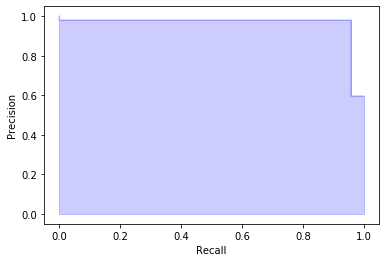

In [62]:
from tqdm import tqdm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
avg_precision = average_precision_score(y_test, y_p)
print(avg_precision)

precision, recall, _ = precision_recall_curve(Y, predictions_X)
plt.step(recall, precision, color = 'b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')

random forest auc=0.982


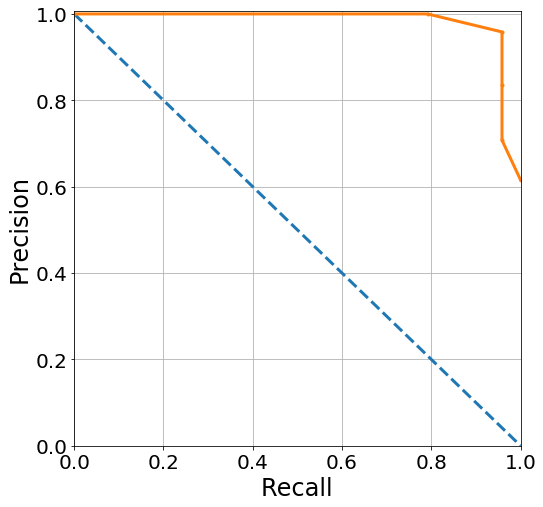

<Figure size 432x288 with 0 Axes>

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot as plt

clf_precision, clf_recall, _ = precision_recall_curve(y_test, rf_pred_X_prob[:,1])
clf_auc = auc(clf_recall, clf_precision)

# summarize scores
print('random forest auc=%.3f' % (clf_auc))

plt.figure(figsize=(8,8))

# plot the precision-recall curves
no_skill = len(y_p[y_p==1]) / len(y_test)
pyplot.plot([0, 1], [1,0], linestyle='--', label='No Skill',linewidth=3.0)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(clf_recall, clf_precision, marker='.', label='Classifier', linewidth=3.0)

# axis labels
pyplot.xlabel('Recall', fontsize=24)
pyplot.ylabel('Precision', fontsize=24)
plt.xlim(0, 1)
plt.ylim(0, 1.007)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
# show the legend
#pyplot.legend()
# show the plot
pyplot.show()


plt.savefig(r'D:\IIT\PhD projects\_dG study\manuscript\images\precision-recall.png', dpi=600)

No Skill: ROC AUC=0.500
RF: ROC AUC=0.960


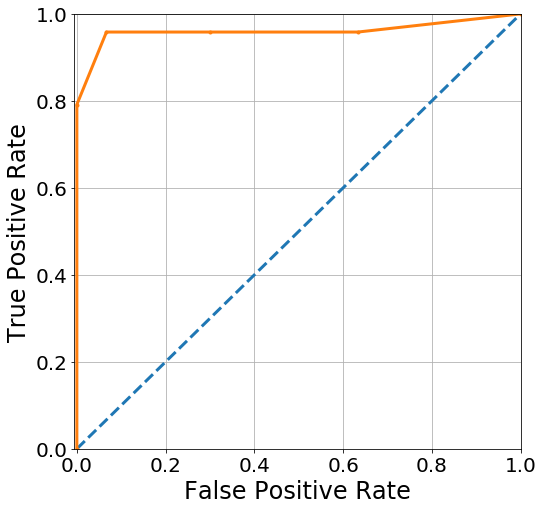

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(8,8))


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', linewidth=3)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RF',linewidth=3)

# axis labels

pyplot.xlabel('False Positive Rate', fontsize=24)
pyplot.ylabel('True Positive Rate', fontsize=24)
plt.xlim(-0.006, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# show the legend
#pyplot.legend()
plt.grid()
# show the plot
pyplot.show()

In [109]:
X.shape

(312, 35)

0.9458333333333334


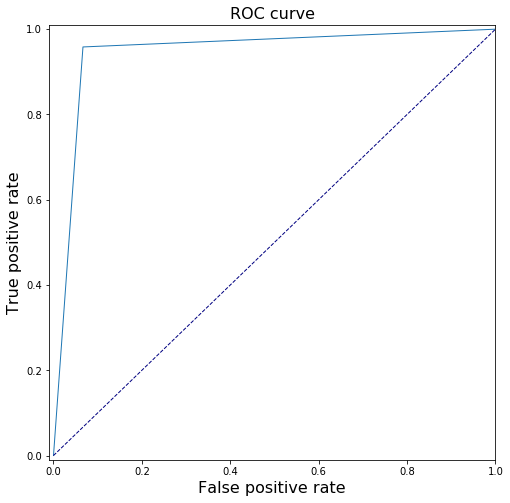

In [63]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_p)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(roc_auc_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1)


plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
plt.show()

In [64]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
AG =[]
for i in range(40):
    model=GaussianNB()
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    AG.append(metrics.accuracy_score(y_test, y_pred))

In [65]:
max(AG) 

0.8589743589743589

In [66]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
K_range = range(1,50)
scores=[]
a=[]
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    a.append(k)

In [67]:
print(max(scores))
print(scores.index(max(scores))) 
a[1] 

0.9102564102564102
1


2

In [177]:
#SVM

from sklearn import svm
sv = svm.SVC(kernel='linear', C=1, probability=True)
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9102564102564102


[0.89 0.84 0.84 0.85 0.89]
0.8619959677419355
[0.92 0.93 0.92 0.94 0.92]
0.9270774193548388
[[113  13]
 [ 10 176]]


Text(0.5, 0, 'Predicted label')

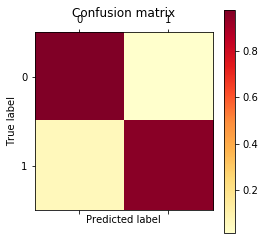

In [178]:
# cross-validation
cv=cross_validate(sv, X, Y, cv=5, return_train_score=True)
print(cv['test_score'])
print(cv['test_score'].mean()) 
print(cv['train_score'])
print(cv['train_score'].mean()) 

Y_all_pred = sv.predict(X)
#confusion matrix
cm = metrics.confusion_matrix(Y, Y_all_pred)
print(cm)
cm2 = cm1/cm1.sum(axis=1)

plt.matshow(cm2, cmap='YlOrRd')
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

whole data
Precision score: 0.9312169312169312
Recall score: 0.946236559139785
F1 score: 0.9386666666666666
test data
Precision score: 0.9183673469387755
Recall score: 0.9375
F1 score: 0.9278350515463918
0.8994309262166404


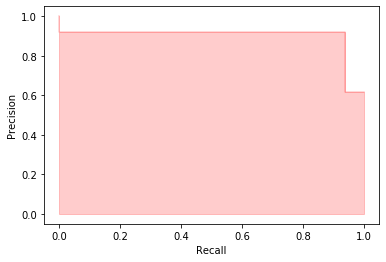

In [179]:
## PR curve
print("whole data")
print("Precision score:", precision_score(Y, Y_all_pred))
print("Recall score:", recall_score(Y, Y_all_pred))
print("F1 score:", f1_score(Y, Y_all_pred))

print("test data")
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color = 'r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')

avg_precision = average_precision_score(y_test, y_pred)
print(avg_precision)

0.9020833333333333


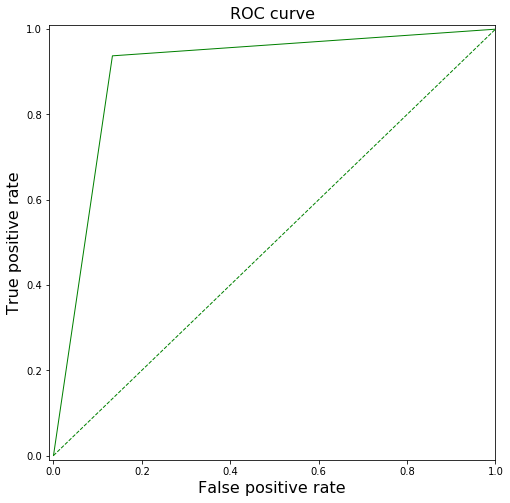

In [180]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(roc_auc_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, color='green')


plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.plot([0,1],[0,1], color='green', lw=1, linestyle='--')
plt.show()

In [186]:
import warnings
explainer = shap.KernelExplainer(sv.predict_proba, x_train, link="logit")

# plot the SHAP values for the Setosa output of the first instance
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(x_test, n_samples=100)


Using 234 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [188]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], x_test.iloc[0,:], link="logit")

In [189]:
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test, link="logit")

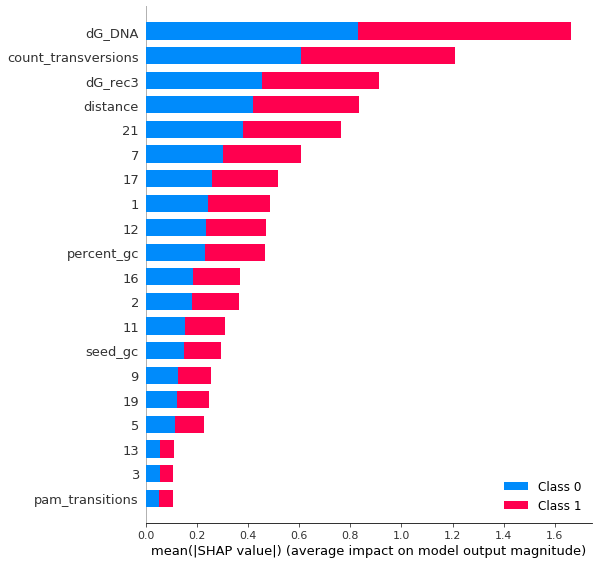

In [190]:
shap.summary_plot(shap_values, X)

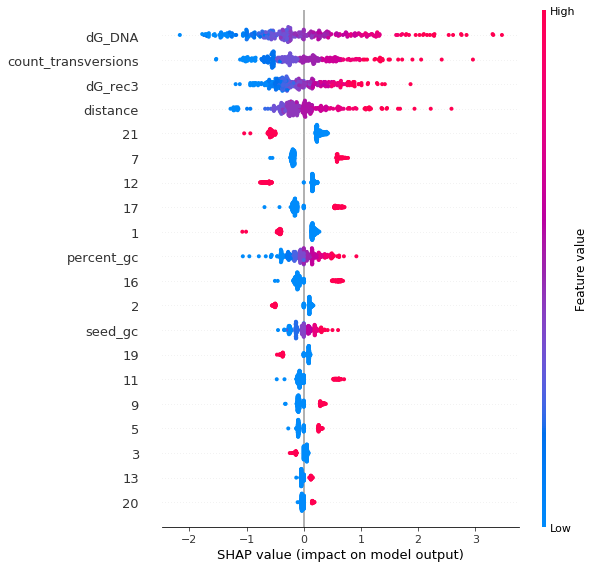

In [204]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values= explainer.shap_values(X)
    
shap.summary_plot(shap_values[0], X)

In [ ]:
sv1 = svm.SVC(kernel='rbf')
sv1.fit(x_train, y_train)
y_pred = sv1.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

In [140]:
sv2 = svm.SVC(kernel='poly')
sv2.fit(x_train, y_train)
y_pred = sv2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


0.8846153846153846


In [141]:
sv3 = svm.SVC(kernel='sigmoid')
sv3.fit(x_train, y_train)
y_pred = sv3.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


0.6153846153846154


In [70]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
AD=[]
for i in range(40):
    dt = DecisionTreeClassifier(random_state=i)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    AD.append(metrics.accuracy_score(y_test,y_pred))

In [71]:
max(AD) 

0.8205128205128205

In [72]:
import shap
shap.initjs()
explainer= shap.TreeExplainer(clf)
shap_values= explainer.shap_values(X)
shap.force_plot(explainer.expected_value[1], shap_values[1])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


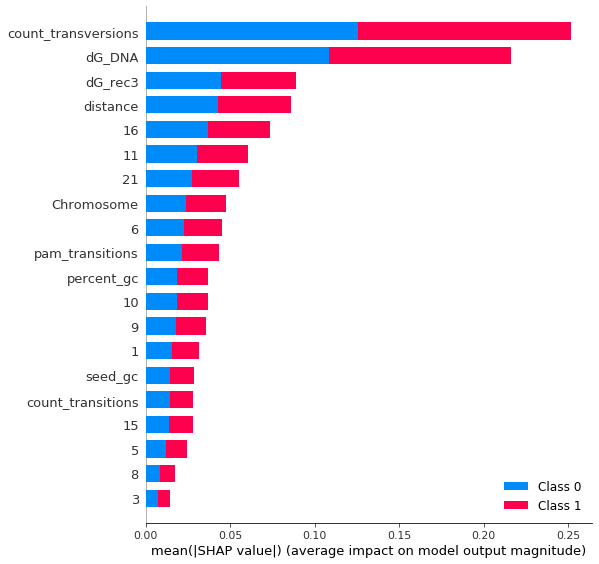

In [73]:
shap.summary_plot(shap_values, X)

In [74]:
def shap_plot(j):
    shap_values_Model = explainer.shap_values(x_test)
    p = shap.force_plot(explainer.expected_value, shap_values_Model[j], x_test.iloc[[j]])
    return(p)

In [75]:
choosen_instance = x_test.loc[[17]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [76]:
choosen_instance = x_test.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [77]:
choosen_instance = x_test.loc[[21]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

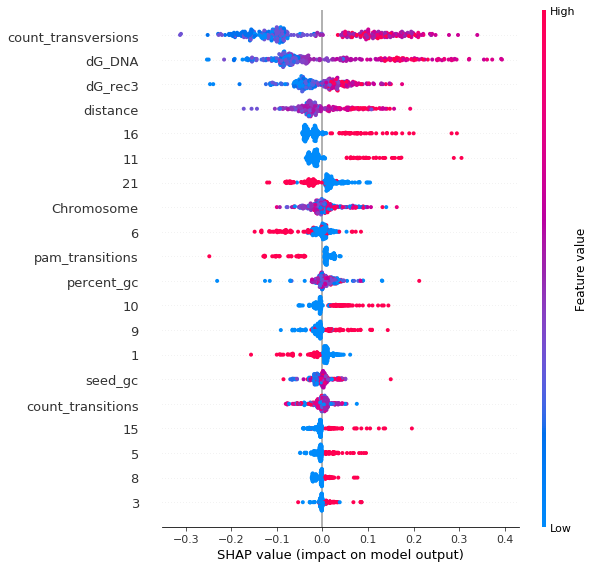

In [78]:
shap_values= explainer.shap_values(X)
shap.summary_plot(shap_values[0], X)

In [79]:

shap.waterfall_plot(explainer.expected_value, shap_values[0], feature_names=X.columns.values, max_display=5, show=True)

ValueError: operands could not be broadcast together with shapes (2,) (35,35) (2,) 

<Figure size 576x288 with 0 Axes>

In [80]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,pam_mm,pam_transitions,pam_transversions,count_transitions,count_transversions,distance,percent_gc,seed_gc,dG_rec3,dG_DNA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.173913,50.0,-120.50,-177.14
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,56.521739,50.0,-133.80,-180.87
2,1,1,1,0,0,0,1,0,0,0,...,1,1,0,3,2,6,43.478261,30.0,-140.54,-148.94
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,60.869565,70.0,-130.96,-184.22
4,1,0,0,0,0,1,1,1,0,0,...,0,0,0,5,1,6,60.869565,50.0,-125.97,-132.21


In [81]:
len(target)

126

In [82]:
data=X

Text(0.5, 1.0, 'Considering dataset with y=0')

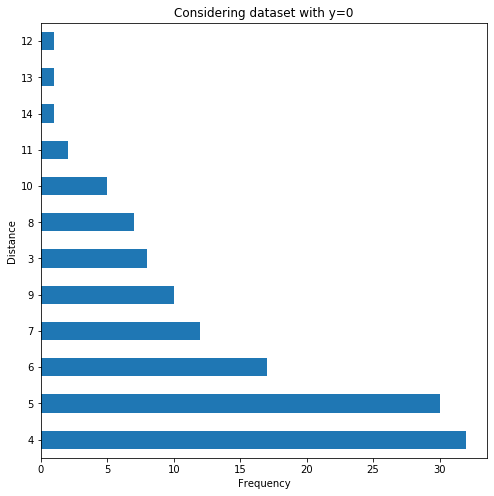

In [84]:
#to calculate frequency of mismatches when y=0
for i in range(len(x)):
    count = x['distance'].value_counts()
count.plot(kind='barh', figsize=(8,8))
plt.ylabel("Distance")
plt.xlabel("Frequency")
plt.title("Considering dataset with y=0")

Text(0.5, 1.0, 'Considering dataset with y=1')

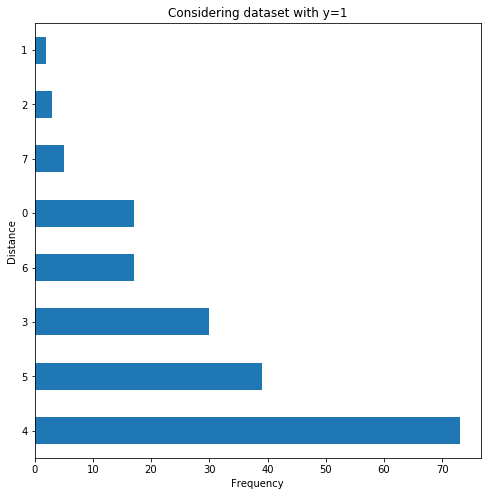

In [85]:
#to calculate frequency of mismatches when y=1
for i in range(len(x1)):
    count1 = x1['distance'].value_counts()
count1.plot(kind='barh', figsize=(8,8))
plt.ylabel("Distance")
plt.xlabel("Frequency")
plt.title("Considering dataset with y=1")

Text(0.5, 1.0, 'Considering entire dataset')

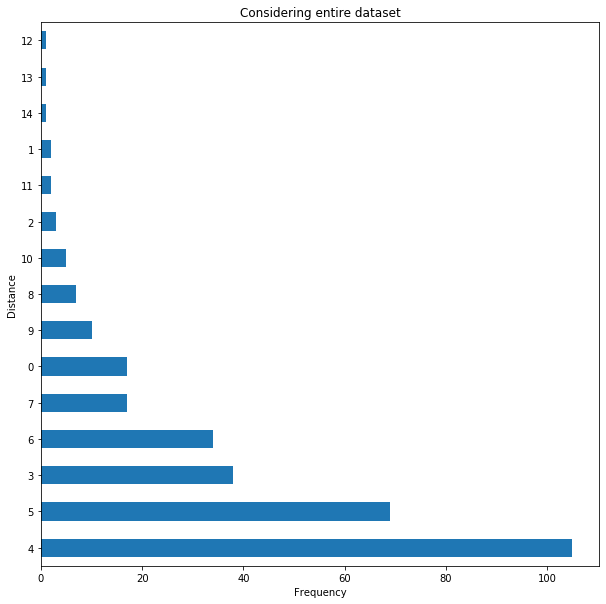

In [86]:
#to calculate frequency of mismatches in X
for i in range(len(X)):
    count2 = X['distance'].value_counts()
count2.plot(kind='barh', figsize=(10,10))
plt.ylabel("Distance")
plt.xlabel("Frequency")
plt.title("Considering entire dataset")

In [87]:
len(X)

312

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBClassifier(objective='reg:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=40, aplha=1, gamma = 5, n_estimators=3000)
xg_reg.fit(x_train, y_train)
pred = xg_reg.predict(x_test)
acc = (metrics.accuracy_score(y_test, pred))

print("Accuracy= ", acc)
print("Precision score:", precision_score(y_test, pred))
print("Recall score:", recall_score(y_test, pred))
print("F1 score:", f1_score(y_test, pred))

In [200]:
xg_reg = xgb.XGBClassifier(objective='reg:logistic', colsample_bytree=0.1, learning_rate=0.1, max_depth=20, aplha=1, gamma = 5, n_estimators=3000)
xg_reg.fit(x_train, y_train, early_stopping_rounds=3, eval_set=[(x_train,y_train)], verbose=False)
pred = xg_reg.predict(x_test)
acc =(metrics.accuracy_score(y_test, pred))
print(acc)
print("Precision score:", precision_score(y_test, pred))
print("Recall score:", recall_score(y_test, pred))
print("F1 score:", f1_score(y_test, pred))

cv=cross_validate(xg_reg, X, Y, cv=5, return_train_score=True)
print(cv['test_score'])
print(cv['test_score'].mean()) 
print(cv['train_score'])
print(cv['train_score'].mean()) 

0.8589743589743589
Precision score: 0.8363636363636363
Recall score: 0.9583333333333334
F1 score: 0.8932038834951457
[0.89 0.82 0.85 0.85 0.85]
0.8555443548387098
[0.91 0.92 0.93 0.92 0.92]
0.9182516129032259


[[ 98  28]
 [ 10 176]]


Text(0.5, 0, 'Predicted label')

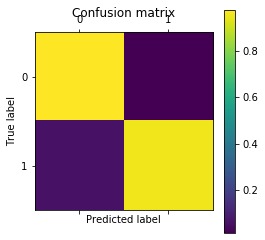

In [201]:
Y_pred = xg_reg.predict(X)
#confusion matrix
cm = metrics.confusion_matrix(Y, Y_pred)
print(cm)
cm2 = cm1/cm1.sum(axis=1)

plt.matshow(cm2)
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

whole data
Precision score: 0.8627450980392157
Recall score: 0.946236559139785
F1 score: 0.9025641025641027
test data
Precision score: 0.8363636363636363
Recall score: 0.9583333333333334
F1 score: 0.8932038834951457
0.8271561771561772


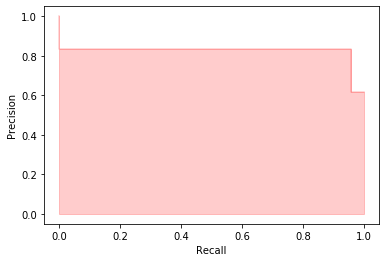

In [202]:
## PR curve
print("whole data")
print("Precision score:", precision_score(Y, Y_pred))
print("Recall score:", recall_score(Y, Y_pred))
print("F1 score:", f1_score(Y, Y_pred))

print("test data")
print("Precision score:", precision_score(y_test, pred))
print("Recall score:", recall_score(y_test, pred))
print("F1 score:", f1_score(y_test, pred))

precision, recall, _ = precision_recall_curve(y_test, pred)
plt.step(recall, precision, color = 'r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')

avg_precision = average_precision_score(y_test, pred)
print(avg_precision)

0.8291666666666666


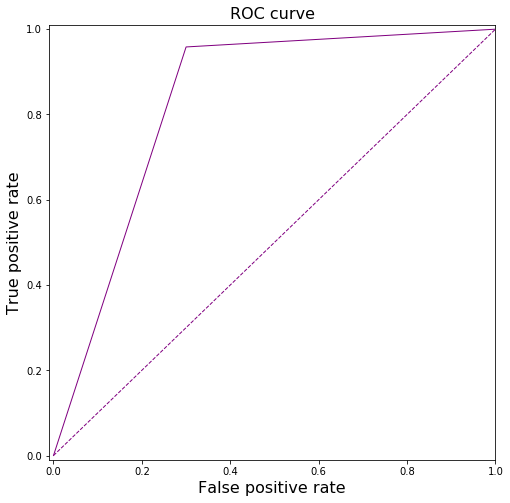

In [203]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(roc_auc_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, color='purple')


plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.plot([0,1],[0,1], color='purple', lw=1, linestyle='--')
plt.show()

In [130]:
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [128]:
choosen_instance = x_test.loc[[17]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

In [125]:
choosen_instance = x_test.loc[[13]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

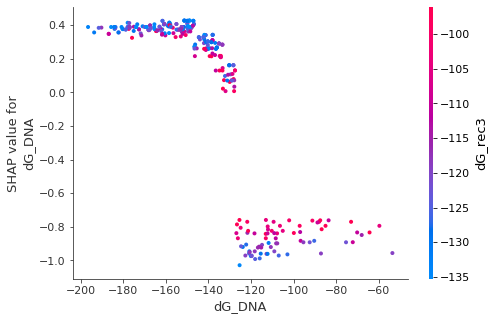

In [116]:
shap.dependence_plot("dG_DNA", shap_values, X)

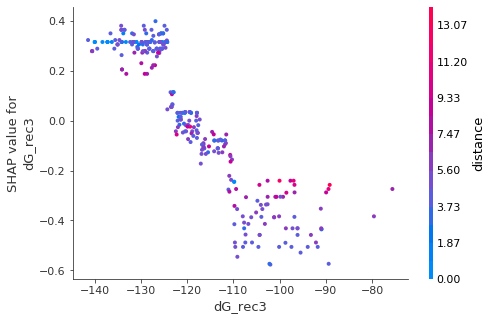

In [131]:
shap.dependence_plot("dG_rec3", shap_values, X)

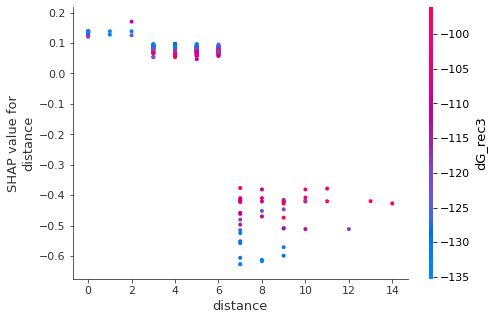

In [134]:
shap.dependence_plot("distance", shap_values, X)

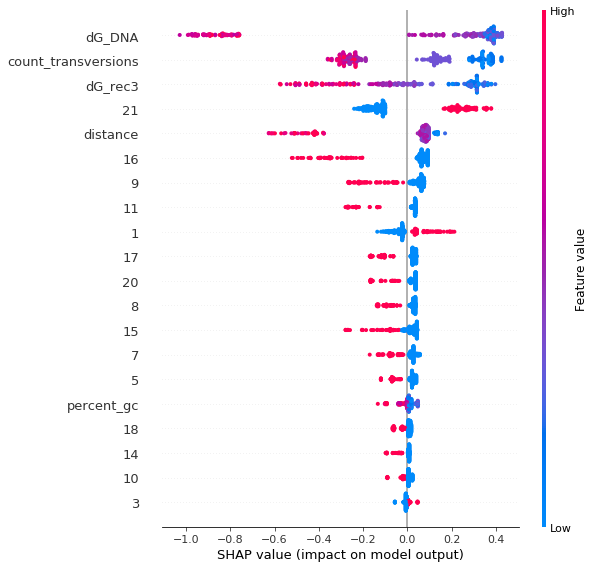

In [117]:
shap.summary_plot(shap_values, X)

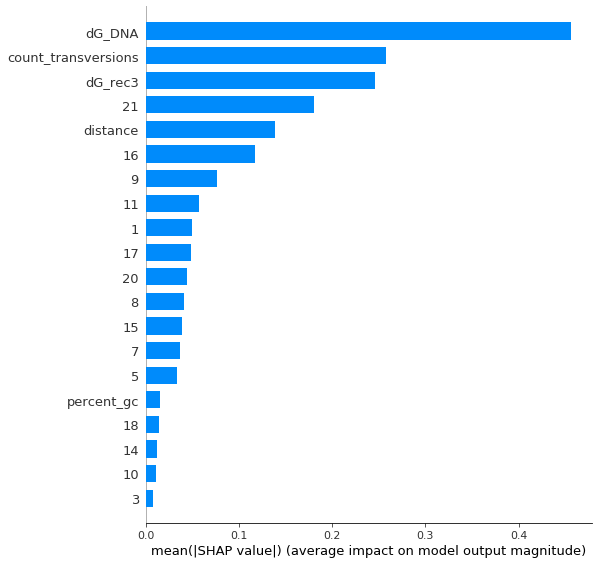

In [137]:
shap.summary_plot(shap_values, X, plot_type="bar")